In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [38]:
df = pd.read_csv('../Dataset/SelectedFeatures-10s-TOR-NonTOR.csv')

In [39]:
print(df.describe(), '\n')

        Source Port   Destination Port      Protocol   Flow Duration  \
count  67834.000000       67834.000000  67834.000000    6.783400e+04   
mean   37912.753324       11566.395967     12.167291    2.991884e+06   
std    20986.077326       18374.765123      5.459410    4.063005e+06   
min       21.000000          21.000000      6.000000    0.000000e+00   
25%    19305.000000         137.000000      6.000000    4.435975e+04   
50%    43677.000000         443.000000     17.000000    4.108570e+05   
75%    54685.000000       16311.000000     17.000000    7.325550e+06   
max    65534.000000       65514.000000     17.000000    1.000000e+07   

        Flow Bytes/s   Flow Packets/s   Flow IAT Mean   Flow IAT Std  \
count   6.783200e+04     6.783400e+04    6.783400e+04   6.783400e+04   
mean             inf              inf    3.155927e+05   2.209662e+05   
std              NaN              NaN    6.988069e+05   6.409506e+05   
min     0.000000e+00     2.002581e-01    0.000000e+00   0.00000

In [40]:
print(df.head())

   Source IP   Source Port  Destination IP   Destination Port   Protocol  \
0  10.0.2.15         53913   216.58.208.46                 80          6   
1  10.0.2.15         53913   216.58.208.46                 80          6   
2  10.0.2.15         53913   216.58.208.46                 80          6   
3  10.0.2.15         53913   216.58.208.46                 80          6   
4  10.0.2.15         53913   216.58.208.46                 80          6   

    Flow Duration   Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0             435            0.0      4597.701149           435.0   
1             259            0.0      7722.007722           259.0   
2             891            0.0      2244.668911           891.0   
3            1074            0.0      1862.197393          1074.0   
4             315            0.0      6349.206349           315.0   

    Flow IAT Std  ...   Bwd IAT Min  Active Mean   Active Std   Active Max  \
0            0.0  ...             0            0  

In [41]:
df.shape

(67834, 29)

Ricerca dei duplicati

In [42]:
duplicati = df[df.duplicated()]
numero_duplicati = df.duplicated().sum()
print('Numero di duplicati: ', numero_duplicati)

Numero di duplicati:  396


In [43]:
duplicati_TOR = df[df.duplicated() & (df['label'] == 'TOR')]
contatore_TOR = duplicati_TOR.shape[0]

duplicati_nonTOR = df[df.duplicated() & (df['label'] == 'nonTOR')]
contatore_nonTOR = duplicati_nonTOR.shape[0]

In [44]:
print('Numero di duplicati TOR: ', contatore_TOR)
print('Numero di duplicati nonTOR: ', contatore_nonTOR)

Numero di duplicati TOR:  6
Numero di duplicati nonTOR:  390


Vado a rimuovere le righe duplicate

In [45]:
df_no_dup = df.drop_duplicates()

In [46]:
df_no_dup.shape

(67438, 29)

Ricerco valori NaN e inf

In [47]:
df_no_dup = df_no_dup.replace([np.inf, -np.inf], np.nan)
nan_values = df_no_dup.isna().sum()
print(nan_values)

Source IP            0
 Source Port         0
 Destination IP      0
 Destination Port    0
 Protocol            0
 Flow Duration       0
 Flow Bytes/s        5
 Flow Packets/s      5
 Flow IAT Mean       0
 Flow IAT Std        0
 Flow IAT Max        0
 Flow IAT Min        0
Fwd IAT Mean         0
 Fwd IAT Std         0
 Fwd IAT Max         0
 Fwd IAT Min         0
Bwd IAT Mean         0
 Bwd IAT Std         0
 Bwd IAT Max         0
 Bwd IAT Min         0
Active Mean          0
 Active Std          0
 Active Max          0
 Active Min          0
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
label                0
dtype: int64


In [48]:
df_no_dup = df_no_dup.copy()
df_no_dup.dropna(inplace=True)
df_no_dup.shape

(67433, 29)

# Esplorazione Features

Suddivisione features numeriche e categoriche


In [49]:
features_binarie = [col for col in df_no_dup.columns if df_no_dup[col].nunique() == 2]
print("Colonne binarie: ", features_binarie)
features_categoriche = df_no_dup.select_dtypes(include=['object']).columns.tolist()
features_categoriche.remove('label')
print("Colonne categoriche: ", features_categoriche) 
features_numeriche = df.select_dtypes(include=['number']).columns.tolist()
features_numeriche.remove(' Protocol')
print("Colonne numeriche: ", features_numeriche)

Colonne binarie:  [' Protocol', 'label']
Colonne categoriche:  ['Source IP', ' Destination IP']
Colonne numeriche:  [' Source Port', ' Destination Port', ' Flow Duration', ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Active Mean', ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max', ' Idle Min']


In [50]:
totale_features = len(features_binarie) + len(features_categoriche) + len(features_numeriche)
print("Numero totale di features: ", totale_features)

Numero totale di features:  29


Esplorerò separatamente le features binarie, categoriche e numeriche.

Vado vedere la distribuzione delle label

In [51]:
label_distribution = df_no_dup['label'].value_counts()
print(label_distribution)

label
nonTOR    59395
TOR        8038
Name: count, dtype: int64


In [52]:
label_distribution = df_no_dup['label'].value_counts(normalize=True) * 100
print(label_distribution)

label
nonTOR    88.08002
TOR       11.91998
Name: proportion, dtype: float64


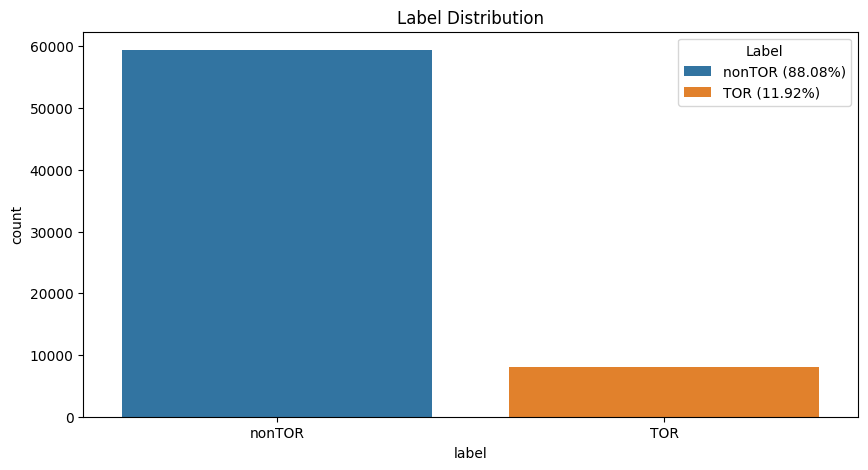

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df_no_dup, hue='label')    
plt.title('Label Distribution')
plt.legend(title='Label', labels=[f'{label} ({percentage:.2f}%)' for label, percentage in zip(label_distribution.index, label_distribution)])
plt.show()

Il dataset è sbilanciato

Analizzo la feature Protocol

In [54]:
protocol_distribution = df_no_dup[' Protocol'].value_counts(normalize=True) * 100
print(protocol_distribution)

 Protocol
17    55.994839
6     44.005161
Name: proportion, dtype: float64


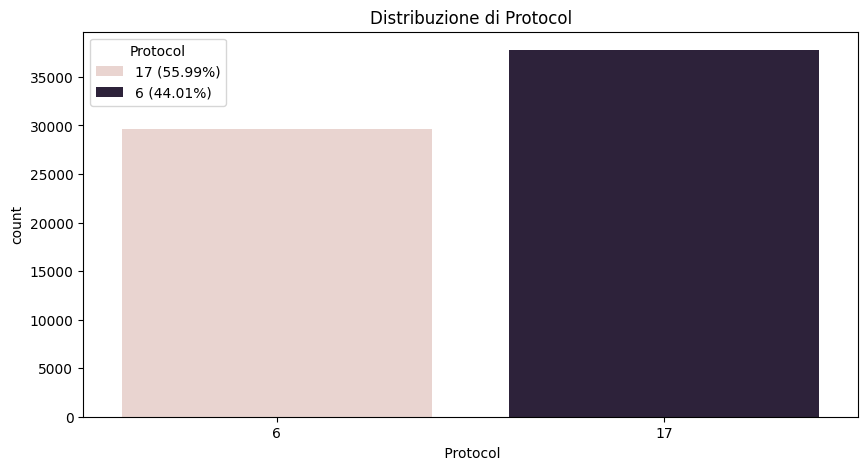

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x=' Protocol', data=df_no_dup, hue=' Protocol')
plt.title('Distribuzione di Protocol')
plt.legend(title='Protocol', labels=[f'{protocol} ({percentage:.2f}%)' for protocol, percentage in zip(protocol_distribution.index, protocol_distribution)])
plt.show()

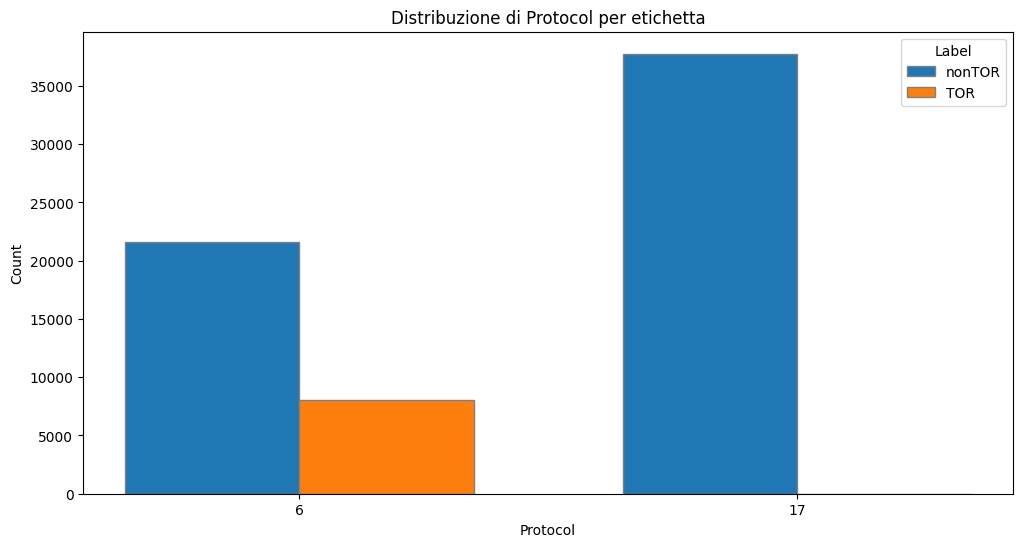

In [56]:
protocol_label_counts = df_no_dup.groupby([' Protocol', 'label']).size().unstack().fillna(0)

protocol_label_counts = protocol_label_counts[['nonTOR', 'TOR']]

bar_width = 0.35

r1 = np.arange(len(protocol_label_counts.index))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))
plt.bar(r1, protocol_label_counts['nonTOR'],  width=bar_width, edgecolor='grey', label='nonTOR')
plt.bar(r2, protocol_label_counts['TOR'], width=bar_width, edgecolor='grey', label='TOR')

plt.xlabel('Protocol')
plt.xticks([r + bar_width/2 for r in range(len(protocol_label_counts.index))], protocol_label_counts.index)
plt.ylabel('Count')
plt.title('Distribuzione di Protocol per etichetta')
plt.legend(title='Label')
plt.show()

Differenza si nota per le differenze tra protocollo TCP e UDP

In [57]:
print(protocol_label_counts)

label       nonTOR     TOR
 Protocol                 
6          21636.0  8038.0
17         37759.0     0.0


In [58]:
num_unique_source_ip = df_no_dup['Source IP'].nunique()
print(f"Numero di valori unici per 'Source IP': {num_unique_source_ip}")

Numero di valori unici per 'Source IP': 787


In [59]:
source_ip_counts = df_no_dup['Source IP'].value_counts()

print("Conteggio di ogni valore unico in 'Source IP':")
print(source_ip_counts)

Conteggio di ogni valore unico in 'Source IP':
Source IP
131.202.240.150    9639
10.0.2.15          6320
10.8.0.14          5406
10.8.8.130         5354
131.202.240.242    5184
                   ... 
211.179.39.118        1
188.230.211.38        1
91.190.218.125        1
122.172.69.123        1
74.125.228.232        1
Name: count, Length: 787, dtype: int64


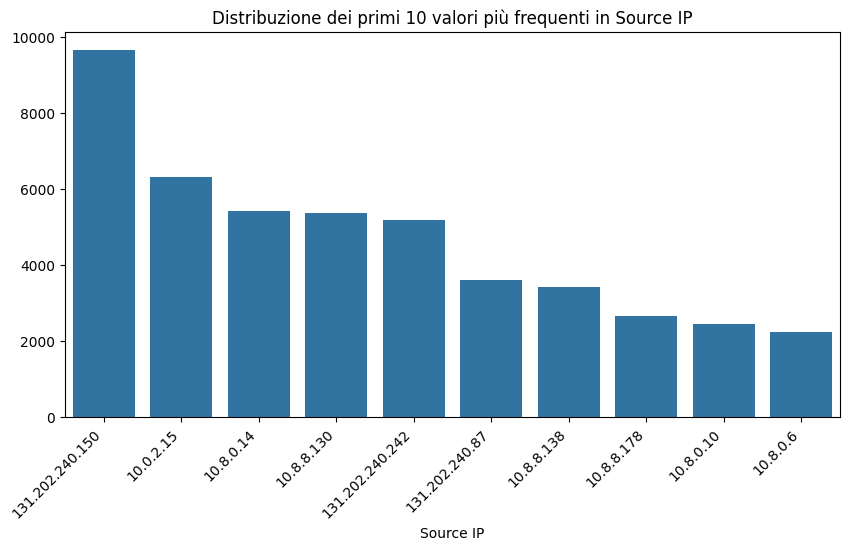

In [60]:
max_values_to_plot = 10
top_source_ip_counts = source_ip_counts.head(max_values_to_plot)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_source_ip_counts.index, y=top_source_ip_counts.values)
plt.title(f'Distribuzione dei primi {max_values_to_plot} valori più frequenti in Source IP')
plt.xticks(rotation=45, ha='right')
plt.show()

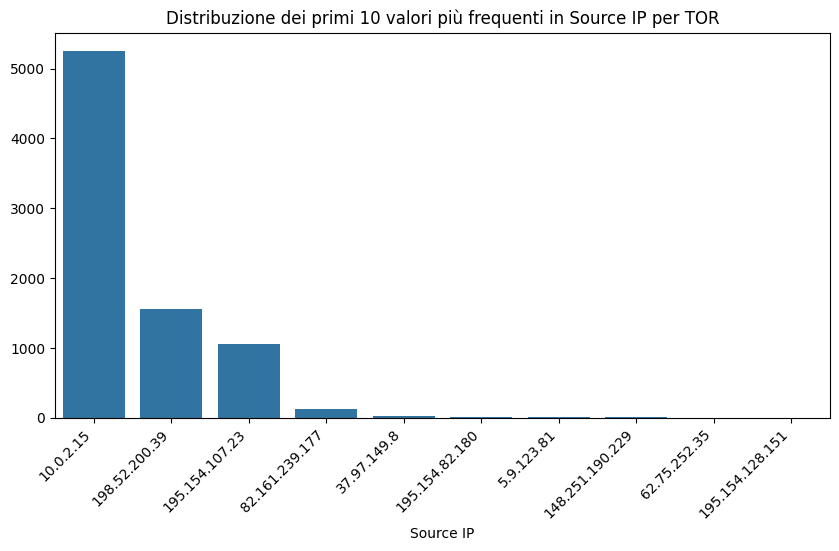

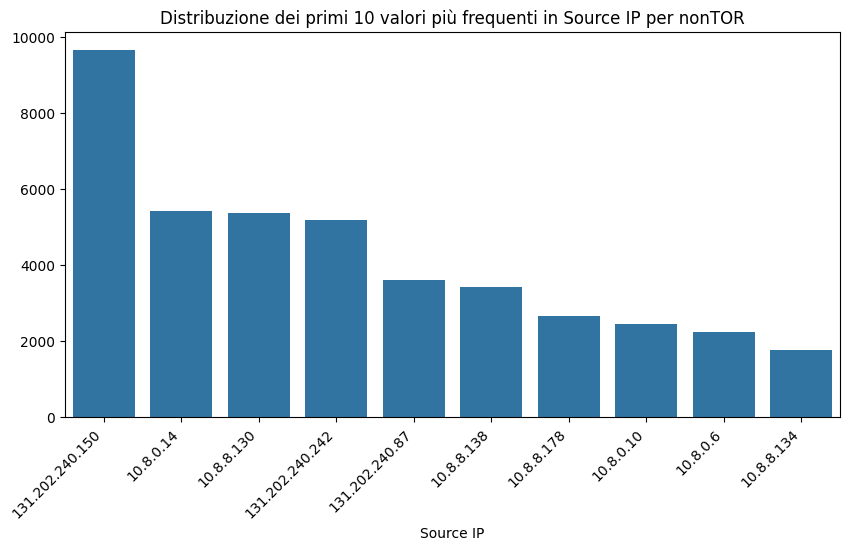

In [61]:
tor_subset = df_no_dup[df_no_dup['label'] == 'TOR']
nontor_subset = df_no_dup[df_no_dup['label'] == 'nonTOR']

tor_source_ip_counts = tor_subset['Source IP'].value_counts().head(max_values_to_plot)
nontor_source_ip_counts = nontor_subset['Source IP'].value_counts().head(max_values_to_plot)

plt.figure(figsize=(10, 5))
sns.barplot(x=tor_source_ip_counts.index, y=tor_source_ip_counts.values)
plt.title(f'Distribuzione dei primi {max_values_to_plot} valori più frequenti in Source IP per TOR')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=nontor_source_ip_counts.index, y=nontor_source_ip_counts.values)
plt.title(f'Distribuzione dei primi {max_values_to_plot} valori più frequenti in Source IP per nonTOR')
plt.xticks(rotation=45, ha='right')
plt.show()

Da rivedere ---> NON VA BENE

In [62]:
# Conta il numero di Source IP per ogni combinazione di label
source_ip_label_counts = df.groupby(['Source IP', 'label']).size().reset_index(name='count')

# Conta il numero di Source IP con traffico solo TOR, solo nonTOR e entrambi
tor_only_count = source_ip_label_counts[source_ip_label_counts['label'] == 'TOR']['count'].eq(1).sum()
nontor_only_count = source_ip_label_counts[source_ip_label_counts['label'] == 'nonTOR']['count'].eq(1).sum()
both_count = source_ip_label_counts.groupby('Source IP')['count'].sum().eq(2).sum()

print(f"Source IP con traffico solo TOR: {tor_only_count}")
print(f"Source IP con traffico solo nonTOR: {nontor_only_count}")
print(f"Source IP con traffico sia TOR che nonTOR: {both_count}")


Source IP con traffico solo TOR: 2
Source IP con traffico solo nonTOR: 429
Source IP con traffico sia TOR che nonTOR: 105


In [63]:
num_unique_destination_ip = df_no_dup[' Destination IP'].nunique()
print(f"Numero di valori unici per 'Destination IP': {num_unique_destination_ip}")

Numero di valori unici per 'Destination IP': 1736


In [64]:
destination_ip_counts = df_no_dup[' Destination IP'].value_counts()

# Stampa il conteggio di ogni valore unico
print("Conteggio di ogni valore unico in ' Destination IP':")
print(destination_ip_counts)

Conteggio di ogni valore unico in ' Destination IP':
 Destination IP
224.0.0.252        9899
131.202.244.5      4310
198.7.63.141       4182
131.202.243.255    3609
10.0.2.15          2977
                   ... 
176.194.241.237       1
78.56.120.78          1
151.250.15.29         1
80.174.169.116        1
10.8.8.245            1
Name: count, Length: 1736, dtype: int64


I valori categorici vanno gestiti, al momento verranno eliminati, ma saranno oggetto di analisi future

In [65]:
df_no_ips = df_no_dup.drop(['Source IP', ' Destination IP'], axis=1)

In [66]:
df_no_ips.shape

(67433, 27)

Esplorazioni feature numeriche

In [67]:
df_no_ips[features_numeriche].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Source Port,67433.0,3.789252e+04,2.099491e+04,21.000000,19305.000000,43623.000000,5.467200e+04,6.553400e+04
Destination Port,67433.0,1.154205e+04,1.839959e+04,21.000000,137.000000,443.000000,1.568500e+04,6.551400e+04
Flow Duration,67433.0,3.009074e+06,4.068738e+06,1.000000,47491.000000,410928.000000,7.424631e+06,1.000000e+07
Flow Bytes/s,67433.0,2.107323e+05,3.999909e+06,0.000000,104.651522,1319.562514,2.152774e+04,6.000000e+08
Flow Packets/s,67433.0,3.032976e+03,4.466077e+04,0.200258,4.861331,16.249858,1.006685e+02,3.000000e+06
Flow IAT Mean,67433.0,3.168673e+05,6.995686e+05,0.500000,9954.755733,86507.250000,4.106330e+05,9.987113e+06
Flow IAT Std,67433.0,2.222802e+05,6.426264e+05,0.000000,0.000000,0.000000,5.952248e+04,7.045491e+06
Flow IAT Max,67433.0,9.031260e+05,1.742099e+06,1.000000,29812.000000,186448.000000,4.756530e+05,9.998126e+06
Flow IAT Min,67433.0,1.929855e+05,5.783539e+05,-2255.000000,26.000000,1305.000000,2.082170e+05,9.987113e+06
Fwd IAT Mean,67433.0,3.516733e+05,8.404145e+05,0.000000,0.000000,19979.530000,4.112770e+05,9.997140e+06


In [68]:
unique_values_count = df_no_ips[features_numeriche].nunique()
print("Numero di valori unici per ciascuna feature numerica:")
print(unique_values_count)

Numero di valori unici per ciascuna feature numerica:
 Source Port         17578
 Destination Port     2213
 Flow Duration       49973
 Flow Bytes/s        50794
 Flow Packets/s      52222
 Flow IAT Mean       52136
 Flow IAT Std        31179
 Flow IAT Max        49705
 Flow IAT Min        26950
Fwd IAT Mean         37448
 Fwd IAT Std         28016
 Fwd IAT Max         36228
 Fwd IAT Min         18476
Bwd IAT Mean         22956
 Bwd IAT Std         21437
 Bwd IAT Max         22018
 Bwd IAT Min          6718
Active Mean           2498
 Active Std              1
 Active Max           2498
 Active Min           2498
Idle Mean             3007
 Idle Std                1
 Idle Max             3007
 Idle Min             3007
dtype: int64


Rimuovo due features, in quanto assumono lo stesso valore per ogni campione

In [69]:
unique_value_columns = df_no_ips[features_numeriche].nunique() == 1
columns_to_drop = unique_value_columns[unique_value_columns].index
features_numeriche = [col for col in features_numeriche if col not in columns_to_drop]
df_no_unique_values = df_no_ips.drop(columns=columns_to_drop)
df_no_unique_values.shape

(67433, 25)

Distribuzioni delle feature numeriche

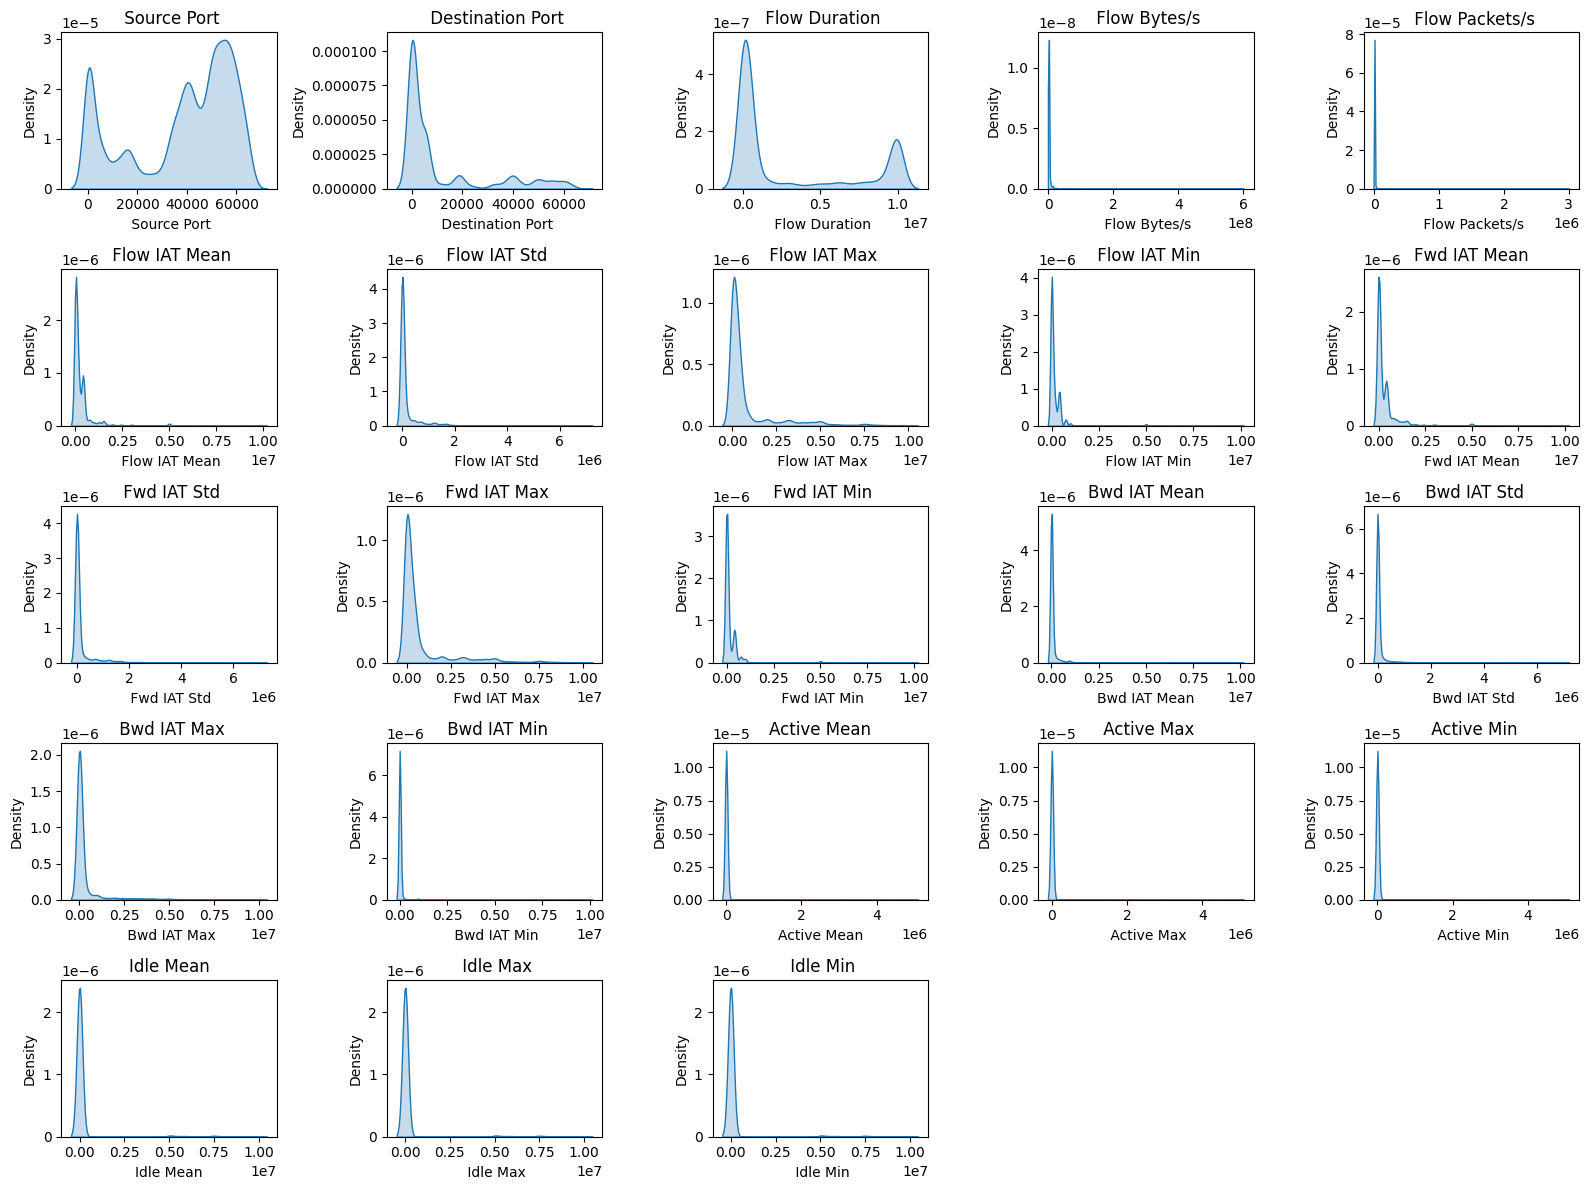

In [70]:
df_numeric = df_no_ips[features_numeriche]

plt.figure(figsize=(16, 12))

for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.kdeplot(df_numeric[column], fill=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Boxplot

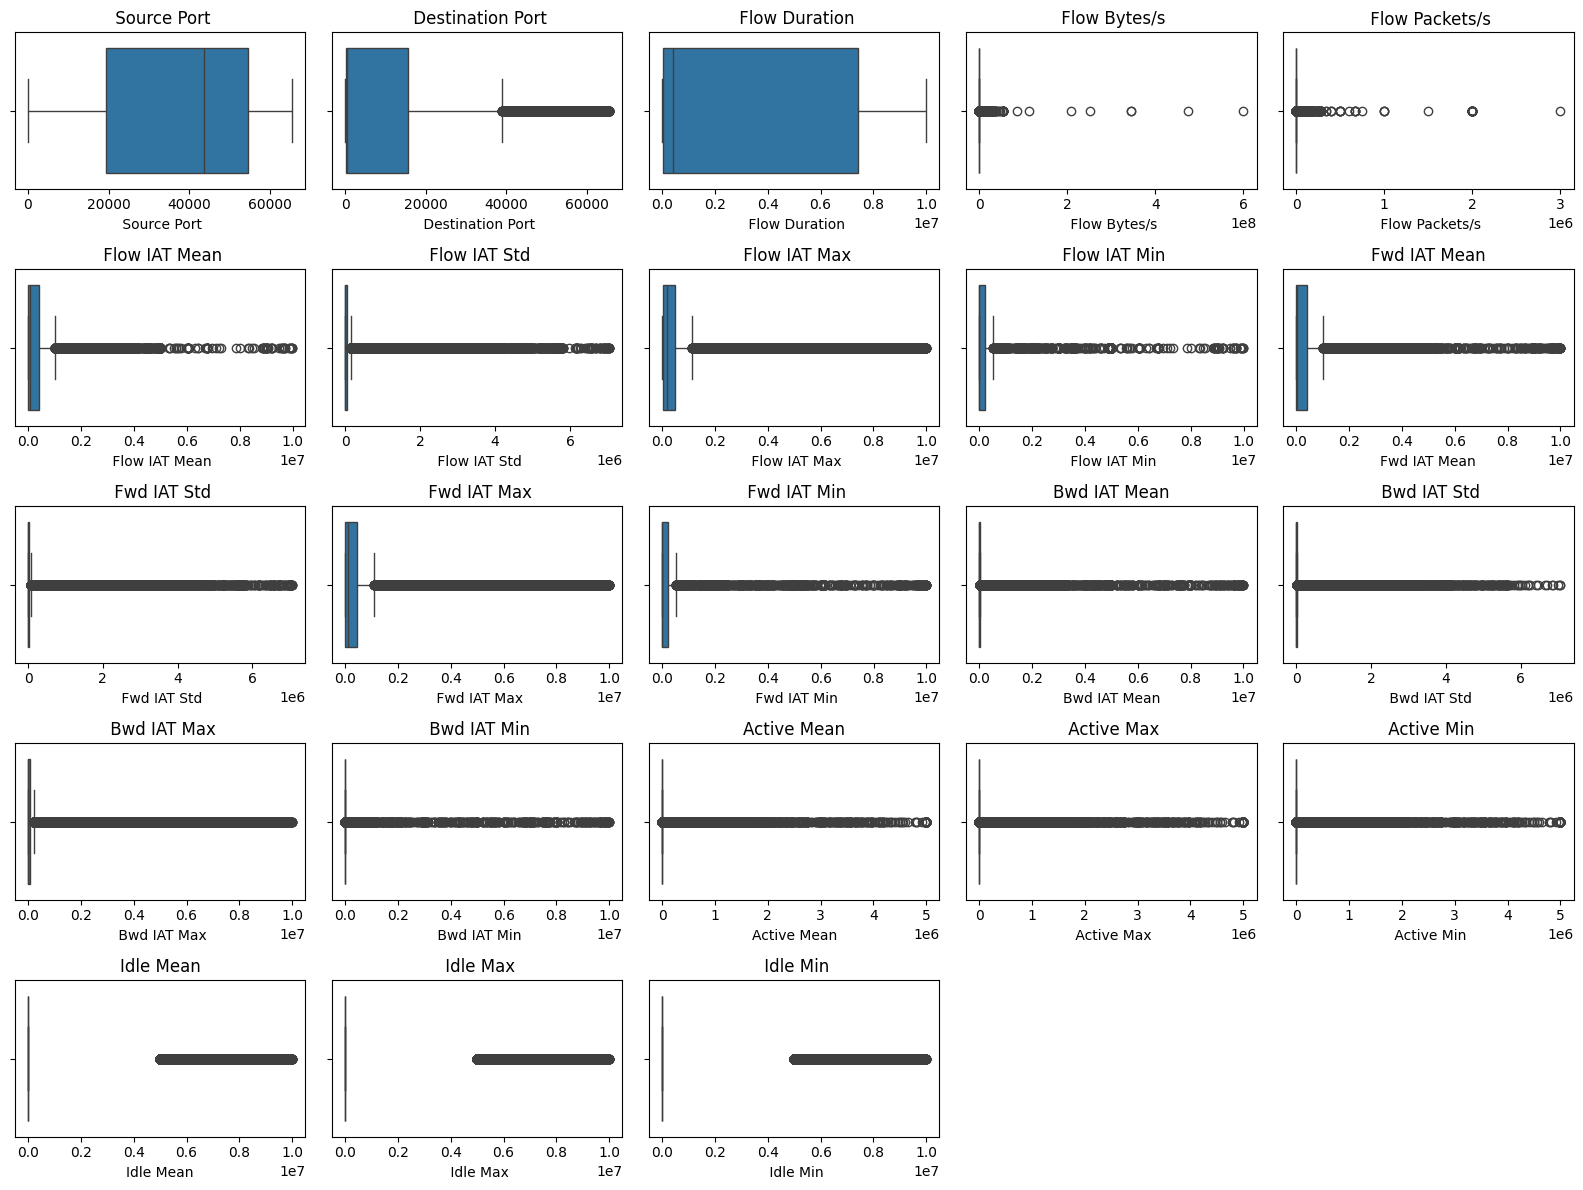

In [71]:
plt.figure(figsize=(16, 12))

for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df_no_ips[column])
    plt.title(column)

plt.tight_layout()
plt.show()

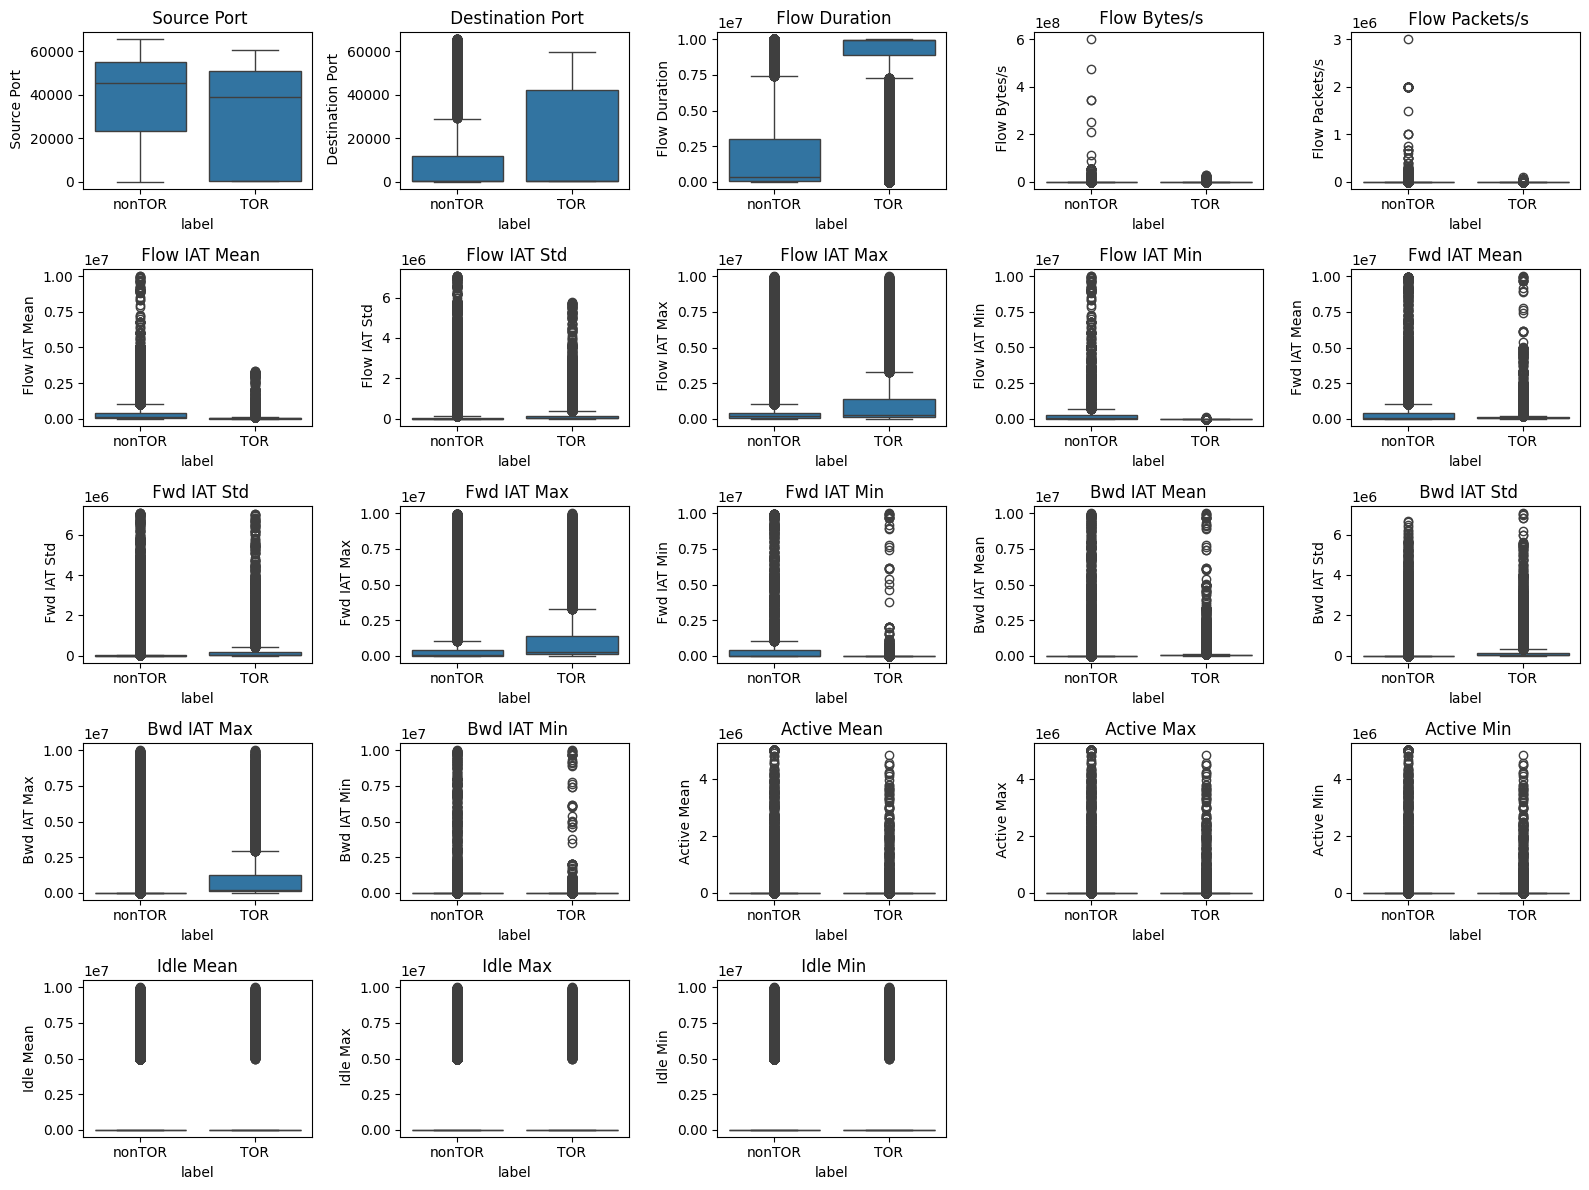

In [72]:
plt.figure(figsize=(16, 12))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df_no_ips['label'], y=df_numeric[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Analisi delle porte

In [77]:
pd.set_option('display.max_columns', None)
port_columns = ['label', ' Source Port', ' Destination Port']
df_port = df_no_ips[port_columns]
source_port_counts = df_port.groupby(['label', ' Source Port']).size().unstack(fill_value=0)
destination_port_counts = df_port.groupby(['label', ' Destination Port']).size().unstack(fill_value=0)
print("Counts for Source Port:")
print(source_port_counts)
print("\nCounts for Destination Port:")
print(destination_port_counts)

Counts for Source Port:
 Source Port  21     22     53     67     68     80     98     110    137    \
label                                                                         
TOR               0      0      0      0      0      0      0    127      0   
nonTOR            6     15      4      2      7    238      1      0   3017   

 Source Port  138    139    161    443    465    993    995    1024   1026   \
label                                                                         
TOR               0      0      0   2647      0      0      0      0      0   
nonTOR          259      4     23   1733    233    273     14      3      1   

 Source Port  1028   1029   1043   1047   1048   1051   1053   1058   1075   \
label                                                                         
TOR               0      0      0      0      0      0      0      0      0   
nonTOR            1      1      1      1      1      1      1      1      1   

 Source Port  1086   1088